<center>
<h1>Digital Epidemiology</h1>
<h2>Master's degree in Data Science - Sapienza University  (2016/2017)</h2>
<h2>Assignment #2</h2>
<h2>Alessandro Gallo</h2>
</center>

# PART 1

## 1.1 Process and plot of the Influnet data and  Wikipedia pageview data for the "Influenza"

### Data Preprocessing

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sbs
from matplotlib import gridspec
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import cross_validation
%matplotlib inline

/home/alessandro/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Preprocessing of the Wikishark data: 
- Read file.csv downloaded from wikishark 
- Organize the datatime column in a week format, considering the ISO calendar system, from a "yyyy-mm-dd" format to a "yyyy-week_number_of_the_year" format.
- Delete the useless 'Week Number' column.

In [2]:
wiki = pd.read_csv('/home/alessandro/jupyter_notebooks/github_codes/Digital Epidemiology (DE)/project2/wiki_file.csv', 
                   parse_dates=['Date'])

L = ['{}-{}'.format(d.Date.isocalendar()[0], str(d.Date.isocalendar()[1]).zfill(2)) for i,d in wiki.iterrows()]
J=pd.Series(L)
wiki['Date']=J
wiki=wiki.drop('Unnamed: 0', axis=1)
wiki=wiki.drop('Unnamed: 6', axis=1)
wiki=wiki.drop(wiki.columns[1], axis=1)

Preprocessing of the Influnet data:
- Read all the Influnet data .txt's contained in the folder
- Put them in a dataframe considering only the 1° ('Settimana') and 5° column ('incidenza_tot')

In [3]:
influ = pd.DataFrame()
os.chdir("/home/alessandro/jupyter_notebooks/github_codes/Digital Epidemiology (DE)/project2/influnet/data")
for file in glob.glob("*.txt"):
    files = open(file, 'r')
    data = pd.read_csv(files, delim_whitespace=True, skiprows=[0], header=None, decimal=",")
    influ = influ.append(data)
influ=influ[[0,4]]
influ=influ.rename(columns = {0:'Date'})

Preprocessing of the final dataset:
- Merge the rows of the wikishark dataset and the influnet Data based on the common dates (this is important to avoid missing dates between the datasets)
- Give a name to the total incidence of the disease (we'll call it 'tot_incidence')
- We'll call the final dataset 'fin'

In [4]:
fin = pd.merge(wiki, influ, how='inner', on=['Date'])
fin=fin.rename(columns = {4:'tot_incidence'})
fin['tot_incidence']=fin['tot_incidence'].astype(float)
print fin.head()

      Date  Influenza[it]  Febbre[it]  Cefalea[it]  Paracetamolo[it]  \
0  2008-01            989        2395         1291              2933   
1  2008-02            962        2553         1360              2547   
2  2008-03           1029        2309         1401              2735   
3  2008-04           1031        2399         1137              2296   
4  2008-05           1021        2419         1274              2222   

   Rinorrea[it]  Mialgia[it]  Vomito[it]  Vaccino antinfluenzale[it]  \
0           103         1291         560                           0   
1           147         1302         634                           0   
2           136          894         658                           0   
3           136          776         519                           0   
4           121          700         594                           0   

   Antibiotico[it]  Tosse[it]  Artralgia[it]  Antipiretico[it]  Polmonite[it]  \
0             1375        436              1         

### Plot of the resulting time series of page views

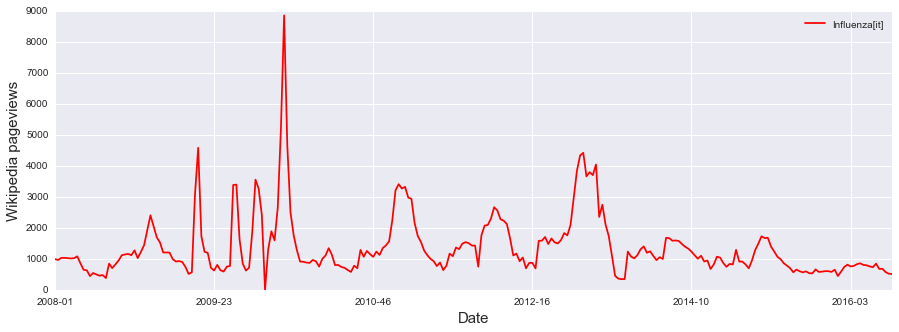

In [470]:
fin.plot(x='Date', y='Influenza[it]', style='r-',figsize=(15,5))
plt.xlabel('Date', fontsize=15);
plt.ylabel('Wikipedia pageviews', fontsize=15);
plt.legend()
plt.show()

## 1.2 Comparison between the two datasets

### Normalize the dataset

Normalizing the dataset columns so that we can make a (human eye) comparison between the values of the pageviews and the influned data

In [6]:
fin_norm=fin
fin_norm=fin_norm.drop('Date', axis=1)
for col in fin_norm:
    fin_norm[col]=(fin_norm[col] - fin_norm[col].mean()) / (fin_norm[col].max() - fin_norm[col].min())
fin_norm.insert(0, 'Date', fin['Date'])
fin=fin_norm

### Plot of the Influnet data and the time series of pageviews

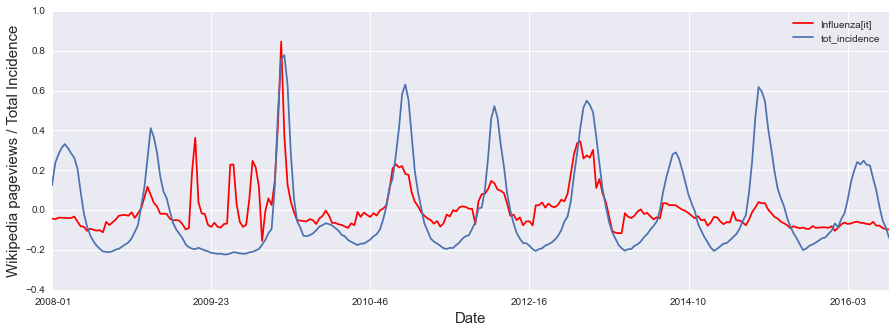

In [472]:
fin.plot(x="Date", y=["Influenza[it]","tot_incidence" ],figsize=(15, 5),style=['r-'])
plt.xlabel('Date', fontsize=15);
plt.ylabel('Wikipedia pageviews / Total Incidence', fontsize=15);
plt.show()

Although the pageviews don't fit perfectly the influnet data, we can assert even now for example that the peaks in 2009 were probably caused by the Influenza H1N1

### Correlation

In [473]:
print ('Correlation between Influnet data and the time series of pageviews is: '+ 
       str(fin.corr(method='pearson', min_periods=1)['tot_incidence'][0])) 

Correlation between Influnet data and the time series of pageviews is: 0.562941539753


# Part 2

## 2.1 Comparison with other wikipedia pageviews

Now we consider other wikipedia pageviews comparing the Influenza pageviews with its symptoms and possible treatments

### Symptom plots

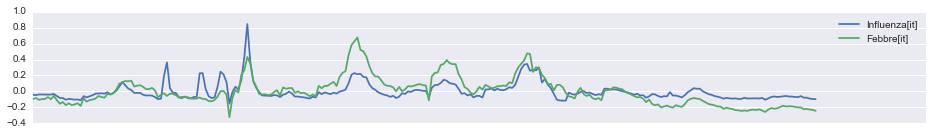

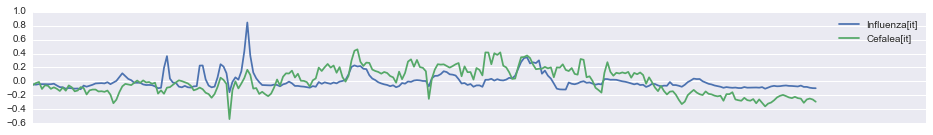

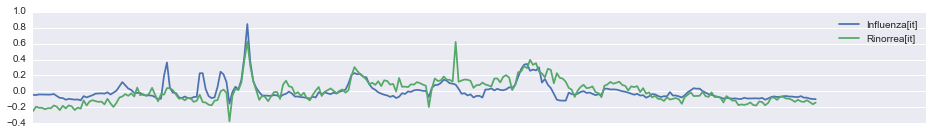

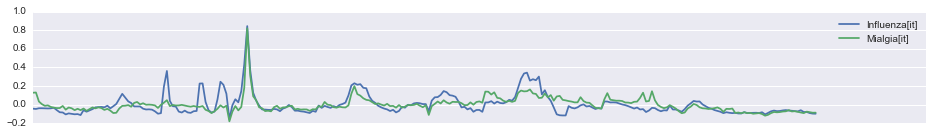

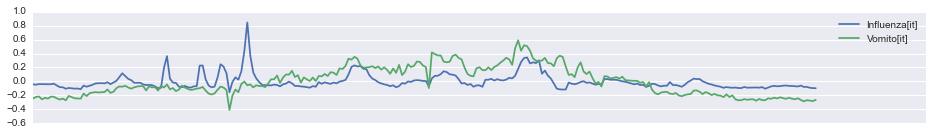

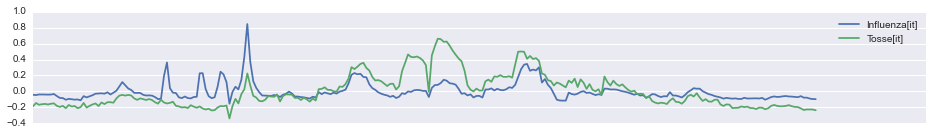

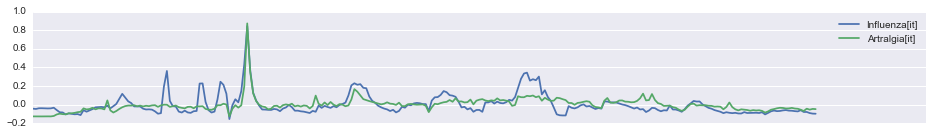

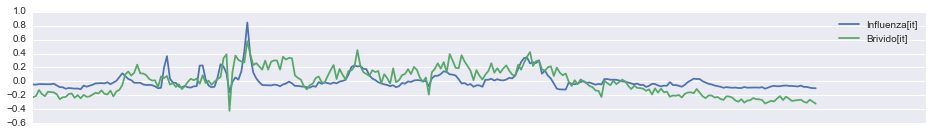

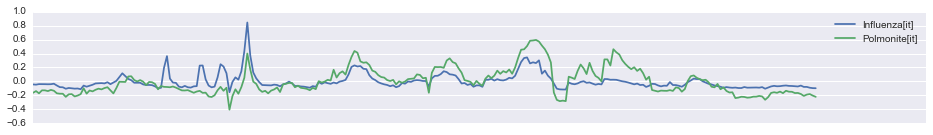

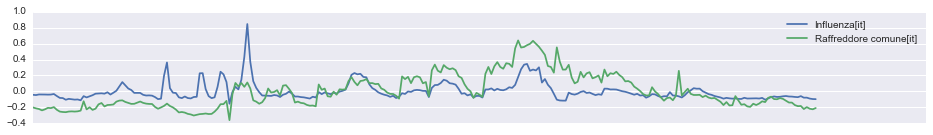

In [474]:
cols = ["Febbre[it]", "Cefalea[it]", "Rinorrea[it]","Mialgia[it]","Vomito[it]","Tosse[it]","Artralgia[it]","Brivido[it]",
        "Polmonite[it]","Raffreddore comune[it]"]
for col in cols:
    plt.close()
    fig, ax = plt.subplots(1,1, figsize=(16,2))
    ax.plot(fin["Influenza[it]"], label="Influenza[it]")
    ax.plot(fin[col], label=col)
    ax.axes.get_xaxis().set_visible(False)
    ax.legend()
    plt.show()

### Countermeasure plots

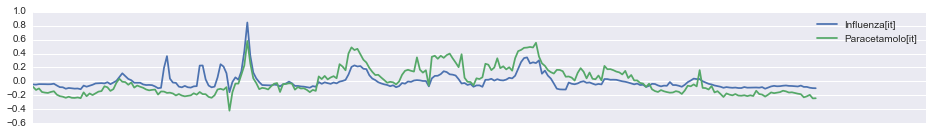

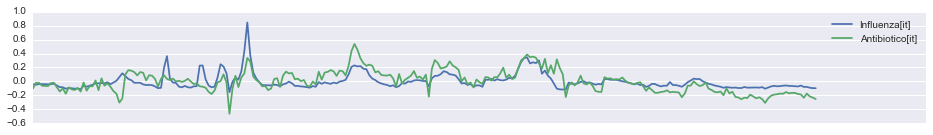

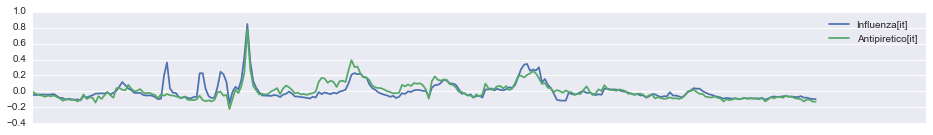

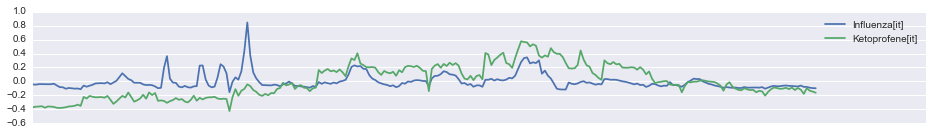

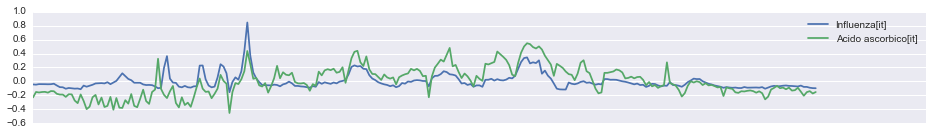

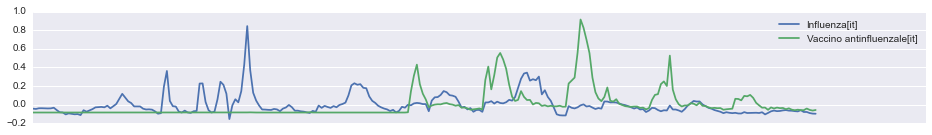

In [475]:
cols = ["Paracetamolo[it]","Antibiotico[it]","Antipiretico[it]",
        "Ketoprofene[it]","Acido ascorbico[it]","Vaccino antinfluenzale[it]"]
for col in cols:
    plt.close()
    fig, ax = plt.subplots(1,1, figsize=(16,2))
    #ax.set_ylim([800, 3000])
    #ax.plot(fin.Date, fin["Influenza[it]"], label="Influenza[it]")
    #ax.plot(fin.Date, fin[col], label=col)
    ax.plot(fin["Influenza[it]"], label="Influenza[it]")
    ax.plot(fin[col], label=col)
    ax.axes.get_xaxis().set_visible(False)
    ax.legend()
    plt.show()

## 2.2 Aggregating the hourly pageview data

If we aggregate the pages in a hourly scale and exclude the night hours, we can certainly decrease the noise because there is a low probability that people are surfing during that time.

## 2.3 Correlation

Correlation between Influnet data and the selected wikipedia pages is:

Influenza[it]                 0.562942
Febbre[it]                    0.488222
Cefalea[it]                   0.155935
Paracetamolo[it]              0.457389
Rinorrea[it]                  0.377636
Mialgia[it]                   0.413573
Vomito[it]                    0.144430
Vaccino antinfluenzale[it]   -0.146312
Antibiotico[it]               0.403855
Tosse[it]                     0.351392
Artralgia[it]                 0.344046
Antipiretico[it]              0.509350
Polmonite[it]                 0.529896
Brivido[it]                   0.209717
Raffreddore comune[it]        0.297845
Ketoprofene[it]               0.205988
Acido ascorbico[it]           0.336745
tot_incidence                 1.000000
Name: tot_incidence, dtype: float64


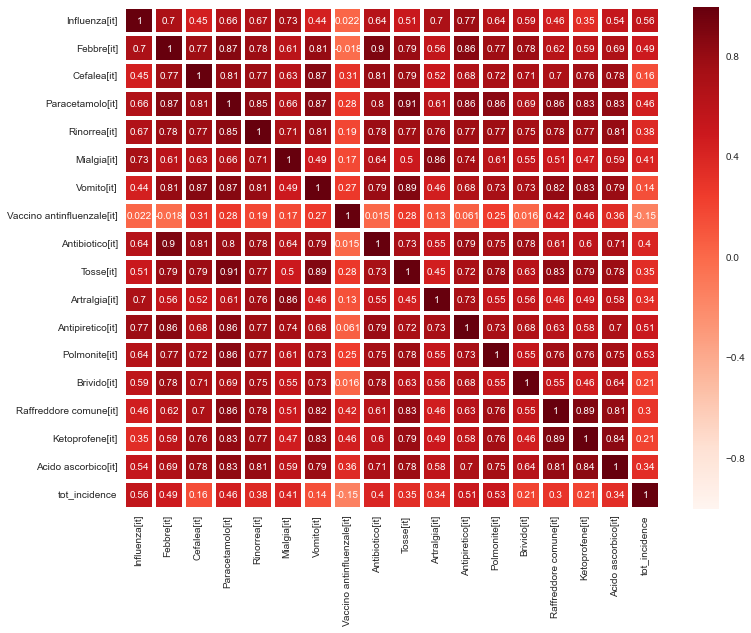

In [476]:
print 'Correlation between Influnet data and the selected wikipedia pages is:\n'
correl=fin.corr(method='pearson', min_periods=1)
print correl['tot_incidence']

plt.rc("figure", figsize=(12, 9))
sbs.heatmap(correl, cmap='Reds', vmax=1.0, vmin=-1.0 , linewidths=2.5, annot=True)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

From this correlation table we can say:
- The best correlated symptoms are: Influenza, Polmonite and Febbre. I found interesting the value of Polmonite, thinking that probably people search Influenza because of the similar symptoms.
- The best correlated countermeasures are: Antipiretico and Paracetamolo.
- The worst correlated is Vaccino antinfluenzale and looking to the plot we can assert that is caused by the people who search about it a while before the seasonal Influenza.

# Part 3
## 3.1 Regression model 

### Ordinary Least Squares (OLS) Regression

Now we're going to make a predictive model for the Influenza incidence using the Ordinary Least Squares regression model. We focus on the parameter $R^2$ that is a number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable and we are interested to make it higher as possible.

In [477]:
fin=fin_norm
cols = fin.columns.tolist()
cols = cols[-1:] + cols[:-1]
fin = fin[cols]
fin=fin.drop('Date', axis=1)
y = fin['tot_incidence']
x = np.array(fin[fin.columns[1:]])
x = sm.add_constant(x) 
out = sm.OLS(endog=y, exog=x).fit()
print out.summary()
print "\nThe R-squared value is: ", out.rsquared

                            OLS Regression Results                            
Dep. Variable:          tot_incidence   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     35.15
Date:                Thu, 22 Dec 2016   Prob (F-statistic):           4.98e-56
Time:                        01:45:04   Log-Likelihood:                 181.28
No. Observations:                 264   AIC:                            -326.6
Df Residuals:                     246   BIC:                            -262.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -1.973e-17      0.008  -2.54e-15      1.0

We obtained a value $R^2=0.708$ but we can make better combining the algorithm with a Cross Validation.

### Ordinary Least Squares (OLS) Regression + Cross Validation

Now we make an OLS regression with a Cross Validation (in the classic way) splitting the dataset in random train and test sets.

The value of R-squared is: 0.750816915694


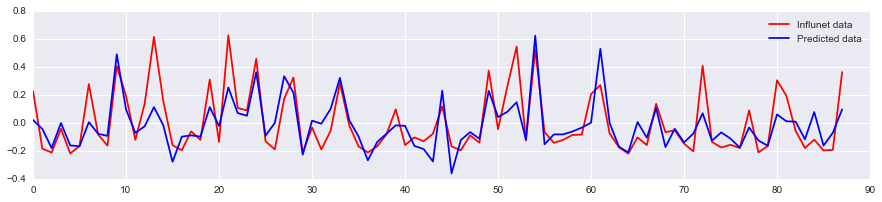

In [478]:
array=fin.values
X = array[:,1:]
Y = array[:,0]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)

x_train = sm.add_constant(X_train) 
out = sm.OLS(endog=Y_train, exog=x_train).fit()
print "The value of R-squared is:", out.rsquared
x_test = sm.add_constant(X_test)
predicted = out.predict(x_test)

inf = Y_test
pr = predicted
fig = plt.figure(figsize=(15,3))
plt.plot(inf, 'r-', label='Influnet data')
plt.plot(pr, 'b-', label='Predicted data')
plt.legend()
plt.show()

The value of $R^2$ is now a little improved to $0.751$ but is not enough. We could certainly improve this parameter using different combination of other algorithms, cross validations and specific dataset features.

## 3.2 Regression model + new features

### Ordinary Least Squares (OLS) Regression

We add now new features to the dataset simply using new columns made by the Influnet incidence for the week preceding the target week and the pageview counts for all the pages you selected for the week preceding the target week.

The value of R-squared is: 0.955865323141


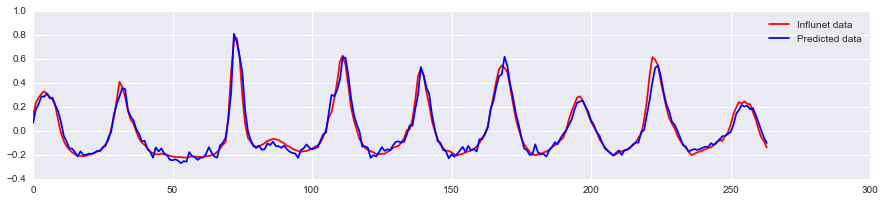

In [479]:
fin2=fin
for column in fin2:
    fin2[column + "_2"] = fin2[column].shift(1)
    fin2[column + "_2"][0] =round(np.mean(fin2[column + "_2"]),2)

y = fin2['tot_incidence']
x = np.array(fin2[fin2.columns[1:]])
x = sm.add_constant(x) 
out = sm.OLS(endog=y, exog=x).fit()
print "The value of R-squared is:", out.rsquared

inf = np.array(fin2['tot_incidence'])
pr = np.array(out.fittedvalues)
fig = plt.figure(figsize=(15,3))
plt.plot(inf, 'r-', label='Influnet data')
plt.plot(pr, 'b-', label='Predicted data')
plt.legend()
plt.show()

As expected the $R^2$ value is very high

### Ordinary Least Squares (OLS) Regression + Cross Validation

We simply add now the same Cross Validation, did before, for the OLS model with the new features.

In [482]:
array=fin2.values
X = array[:,1:]
Y = array[:,0]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=test_size, random_state=seed)
x_train = sm.add_constant(X_train) 
out = sm.OLS(endog=Y_train, exog=x_train).fit()
print "The value of R-squared is:", out.rsquared
x_test = sm.add_constant(X_test)
yp = out.predict(x_test)

The value of R-squared is: 0.959652540167


We can see how the value of $R^2$ is slightly improved.